In [1]:
import utils
from models import Dataset, BeautyModel
import numpy as np

Using TensorFlow backend.


In [2]:
dataset = Dataset('./dataset', './dataset/SCUT_FBP.csv')
model = BeautyModel('./models/50beauty.h5')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
Attractiveness label    500 non-null float64
Standard Deviation      500 non-null float64
Files                   500 non-null object
dtypes: float64(2), object(1)
memory usage: 11.8+ KB


2017-07-06 16:45:54,317 : INFO : shape of train data: (500, 227, 227, 3)
2017-07-06 16:45:54,325 : INFO : Load data Done!


In [3]:
from matplotlib import pyplot
from scipy.misc import toimage
import matplotlib.image as mpimg


_, _, picture, label = dataset.getTrainTest()
print model.getEvaluate(picture, label)

mean_squared_error: 89.19%
None


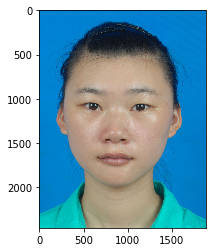

Attractiveness label                          1.931
Standard Deviation                             0.54
Files                   ./SCUT_FBP/SCUT-FBP-175.jpg
Name: 174, dtype: object
1.81337788701


In [4]:
"""
test raw image
"""
raw_data = dataset.raw_data

predict = raw_data.iloc[174]
img = mpimg.imread(utils.getRealPath(predict['Files']))
pyplot.imshow(img)
pyplot.show()
print predict
score = model.predict(predict['Files'], False)[0][0]
print score*5

In [5]:
"""
show chart with deviation
"""
score_labels = []
stds = []
score_predicts = []
imgs = []

num = 10
indexs = np.random.randint(0, len(raw_data.index)-1, 10)
for index in indexs:
    data = raw_data.iloc[index]
    img = mpimg.imread(utils.getRealPath(data['Files']))
    imgs.append(img)
    score_labels.append(data['Attractiveness label'])
    stds.append(data['Standard Deviation'])
    score = model.predict(data['Files'], False)[0][0]
    score_predicts.append(score*5)
    
#plot
pyplot.rcParams["figure.figsize"] =(40,20)
ind = np.arange(len(imgs))  # the x locations for the groups
width = num / 40.    # the width of the bars

fig, ax = pyplot.subplots()
rects1 = ax.bar(ind, score_labels, width, color='b', yerr=stds)

rects2 = ax.bar(ind + width, score_predicts, width, color='Y')

ax.legend((rects1[0], rects2[0]), ('Human', 'Model'))

# y = fig.add_subplot()
# y = fig.add_axes()
for k in range(len(imgs)):
    y = fig.add_axes([0.03 + 0.3*width*k,0.01,0.07/width,0.12])
    y.imshow(imgs[k])
    y.set_xticks([])
    y.set_yticks([])
    


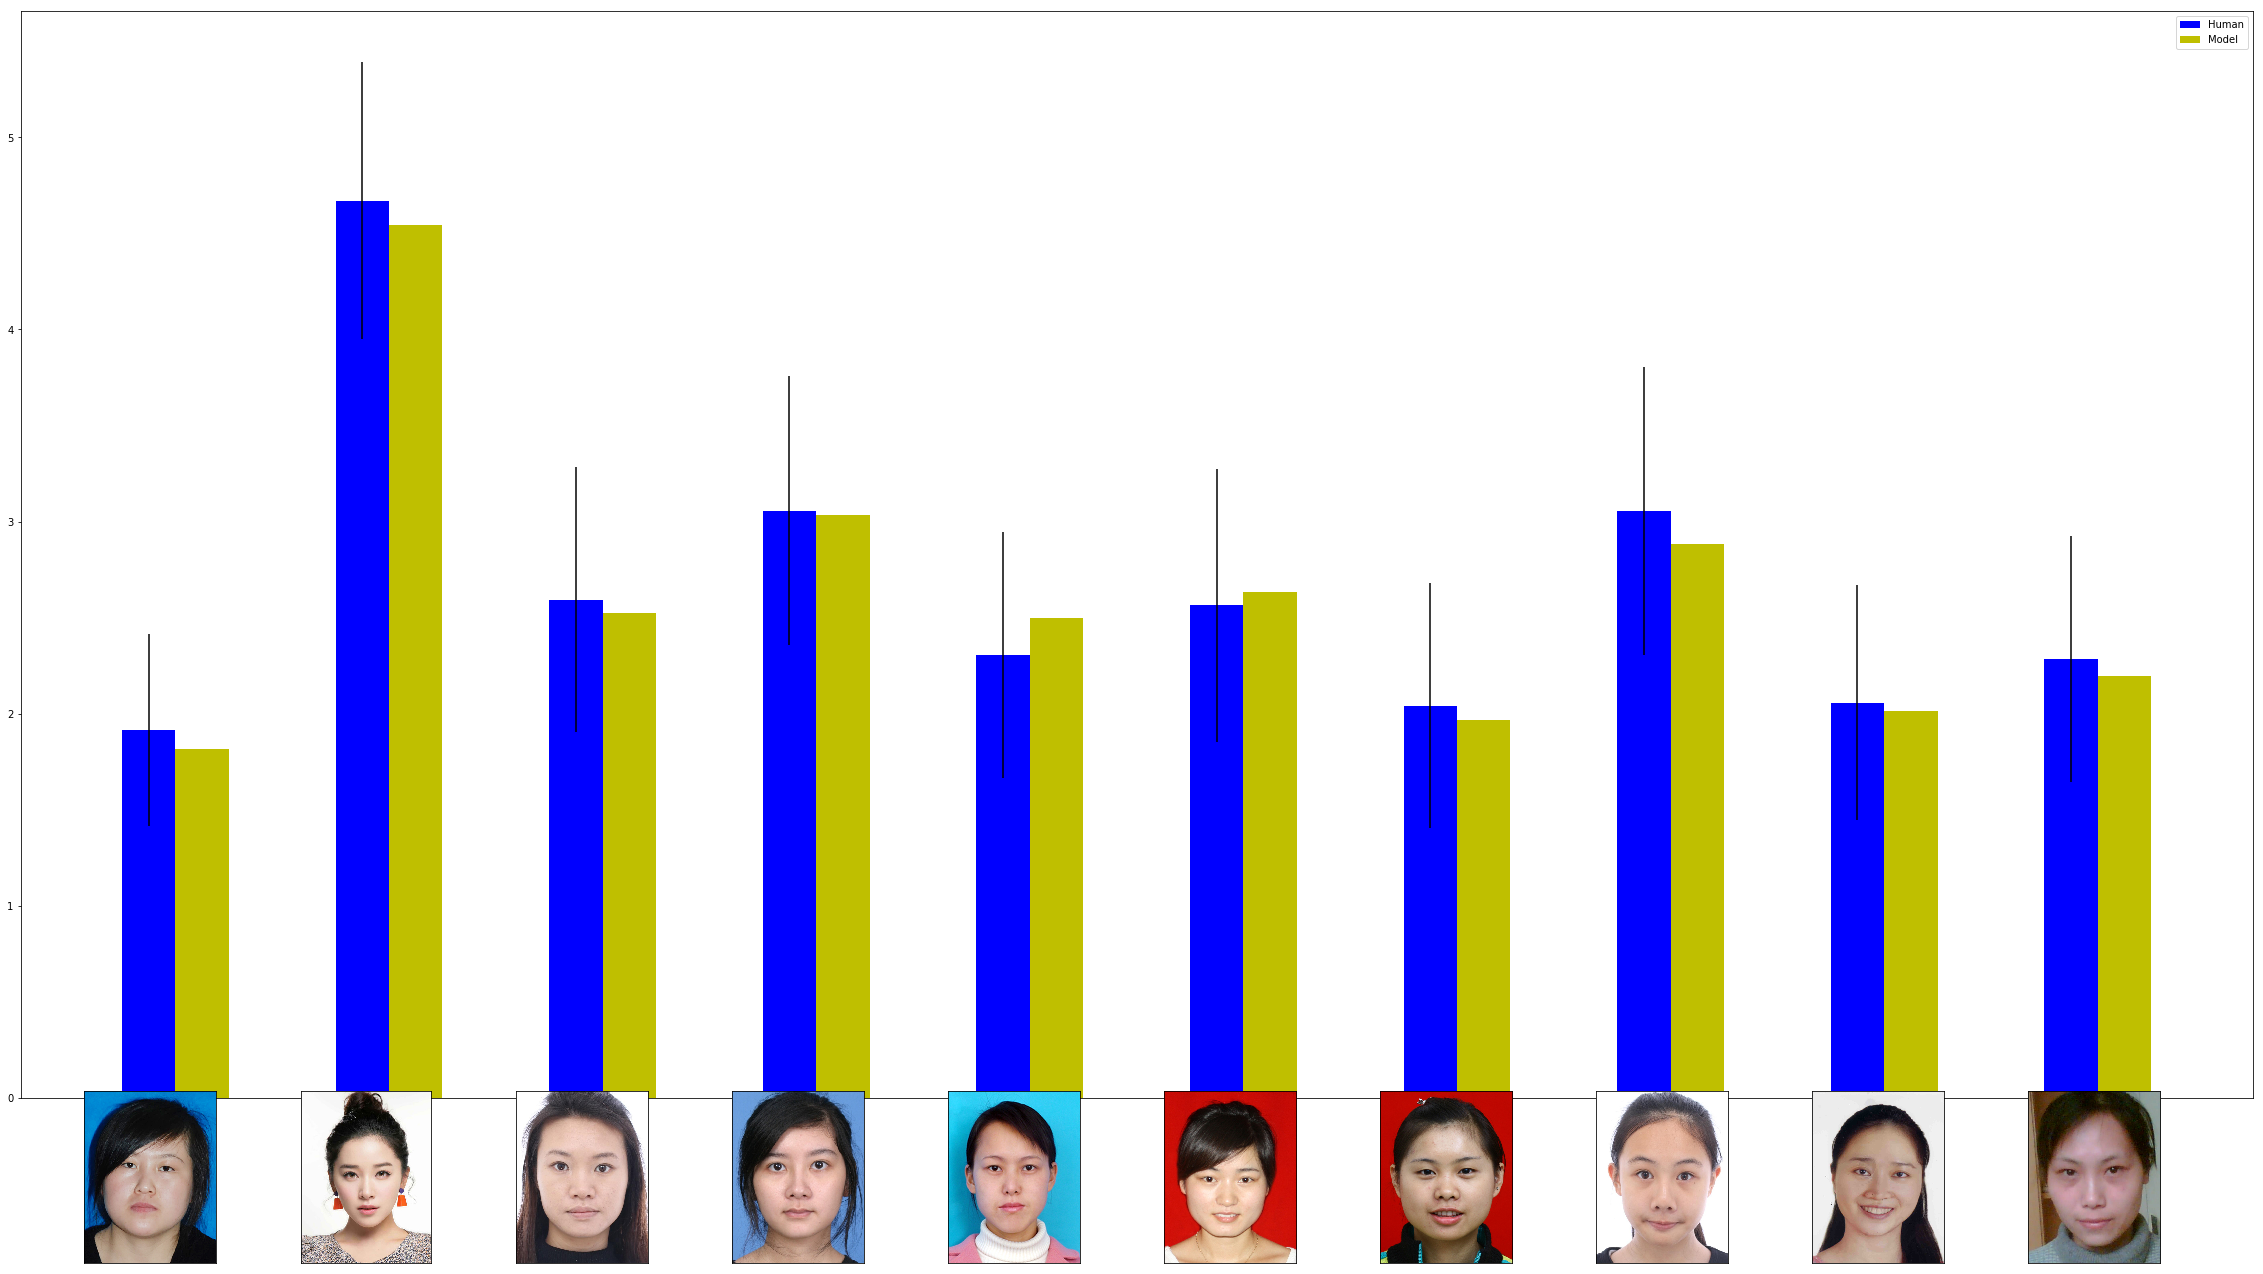

In [6]:
pyplot.show()

In [38]:
imgs = []
pics = ['./vngirls/mytam.png',
        './vngirls/tangthanhha.png',
        './vngirls/havi.png',
        './vngirls/ngoctrinh.png']
score_predicts = []
for i in pics:
    imgs.append(mpimg.imread(i))
    score = model.predict(i, False)[0][0]
    score_predicts.append(score*5)

    #plot
pyplot.rcParams["figure.figsize"] =(40,20)
ind = np.arange(len(imgs))  # the x locations for the groups
width = num / 40.    # the width of the bars

fig, ax = pyplot.subplots()
# rects1 = ax.bar(ind, score_labels, width, color='b', yerr=stds)

rects2 = ax.bar(ind + width, score_predicts, width, color='G')

# ax.legend((rects1[0]), ('Model'))

# y = fig.add_subplot()
# y = fig.add_axes()
for k in range(len(imgs)):
    y = fig.add_axes([0.15 + 0.22*k,0.01,0.07,0.12])
    y.imshow(imgs[k])
    y.set_xticks([])
    y.set_yticks([])
    


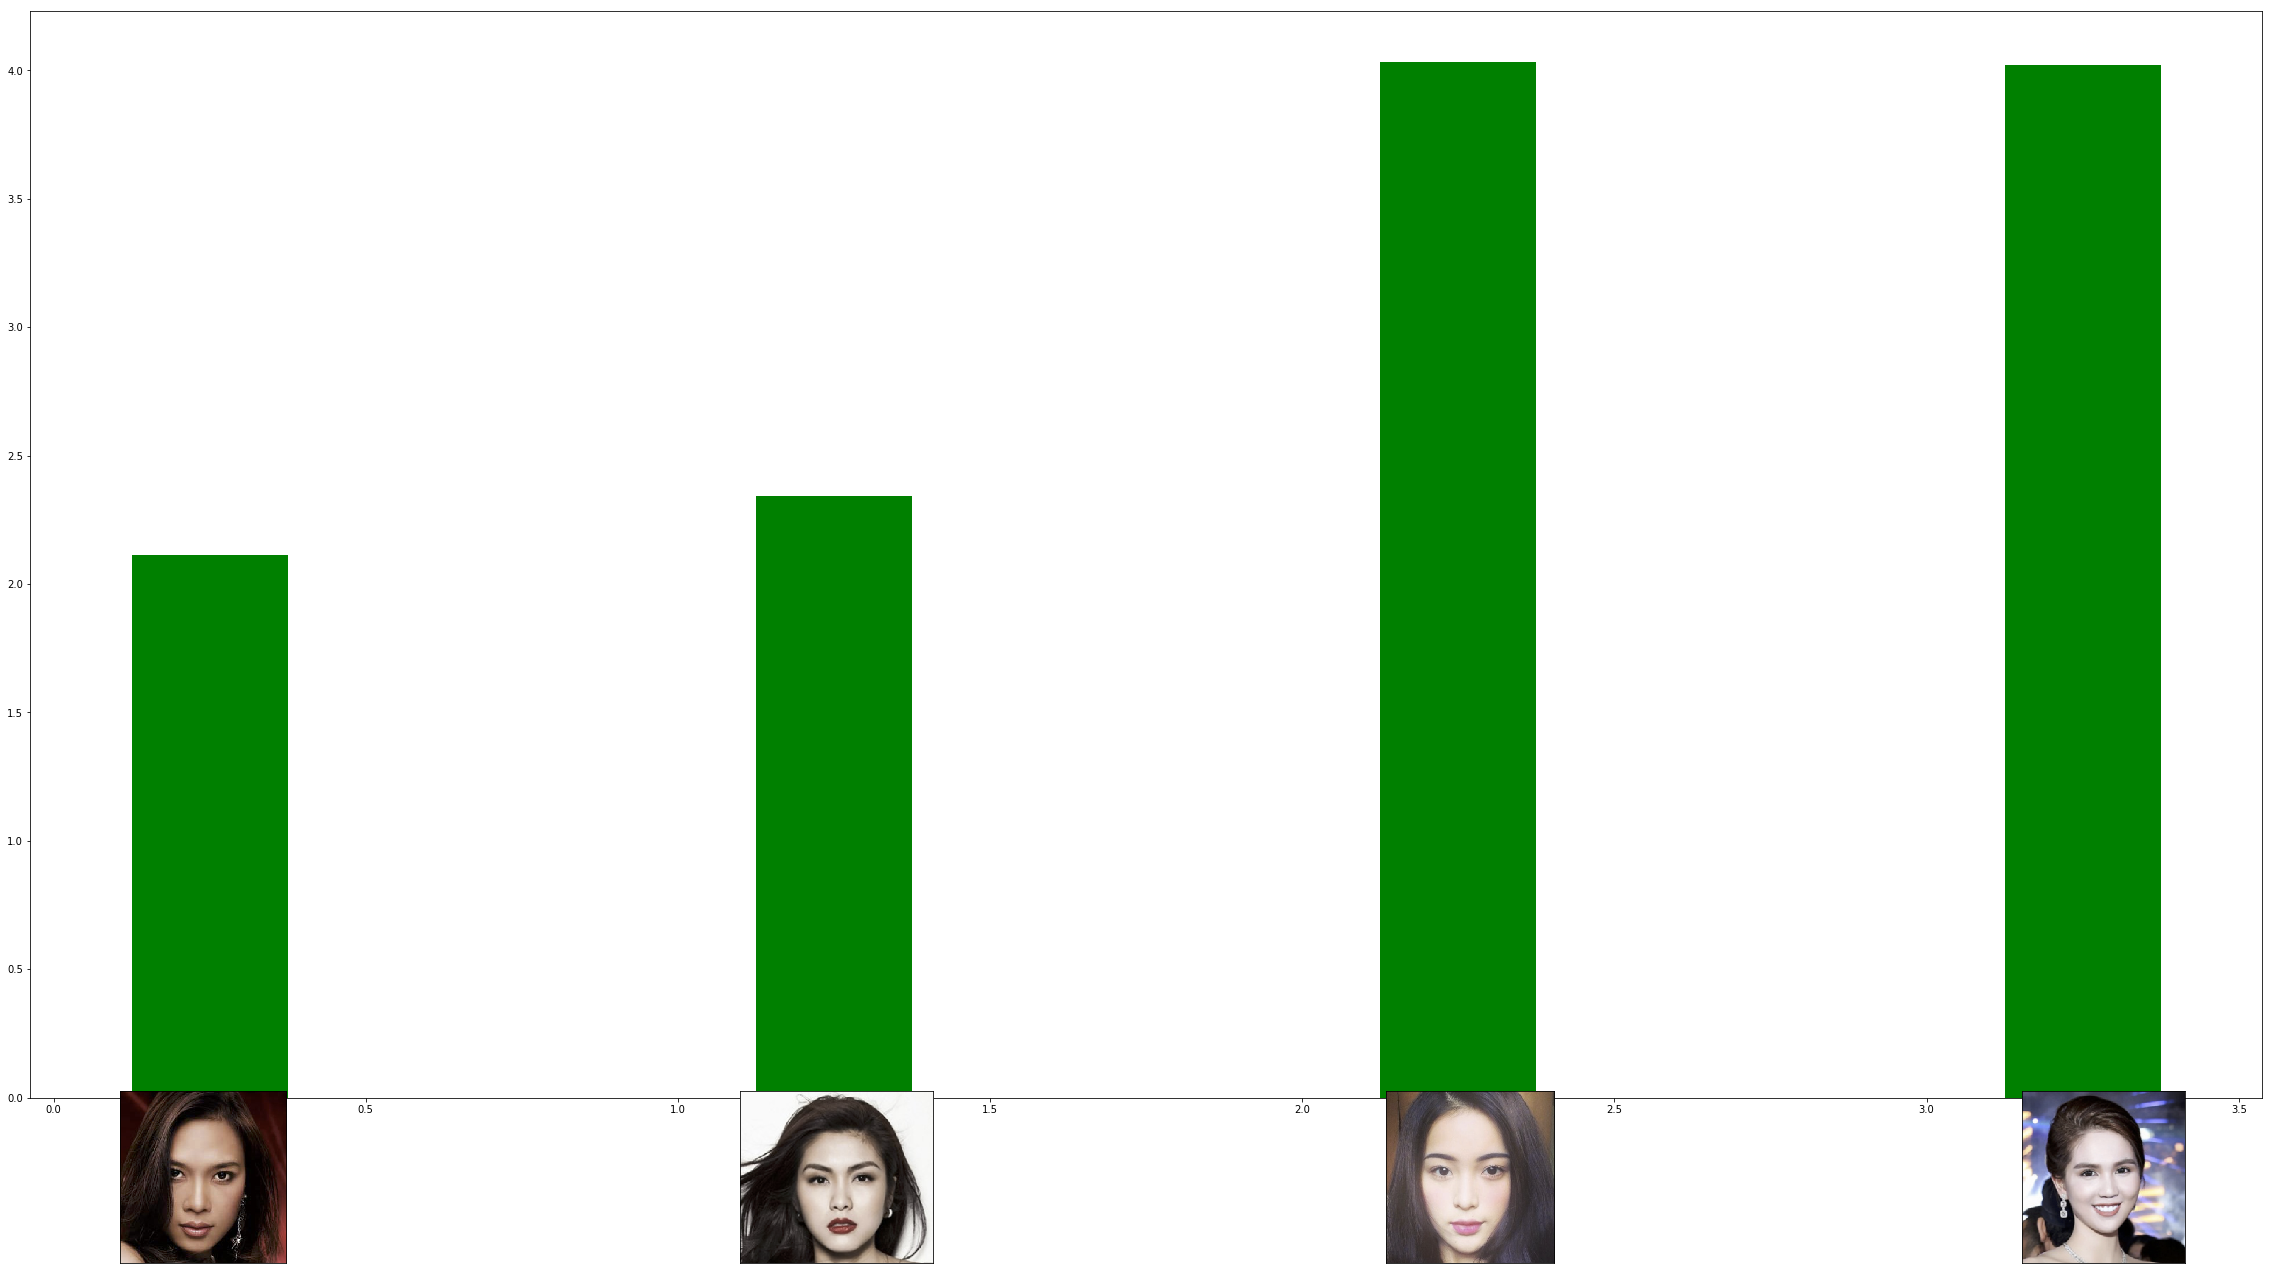

In [39]:
pyplot.show()